In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

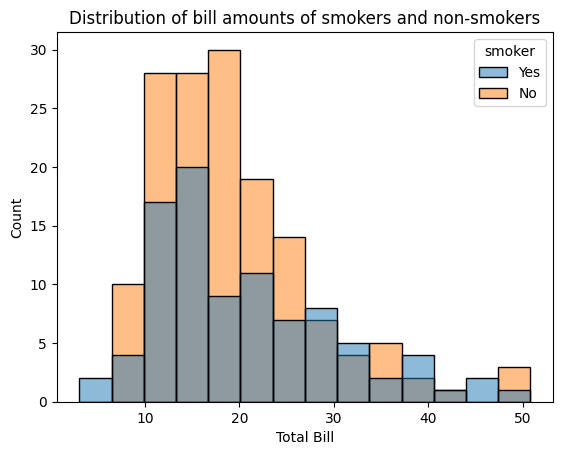

In [2]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.

sns.histplot(tips,
             x = "total_bill",
             hue = "smoker")

plt.xlabel("Total Bill")
plt.title("Distribution of bill amounts of smokers and non-smokers")
plt.show()


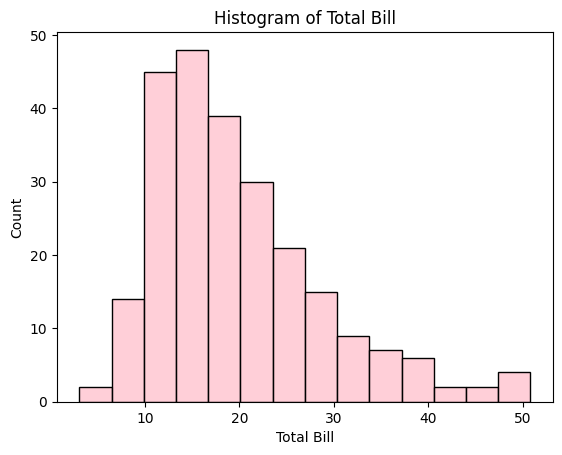

In [4]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

sns.histplot(tips,
             x = "total_bill",
             color = "pink")
plt.xlabel("Total Bill")
plt.title("Histogram of Total Bill")
plt.show()


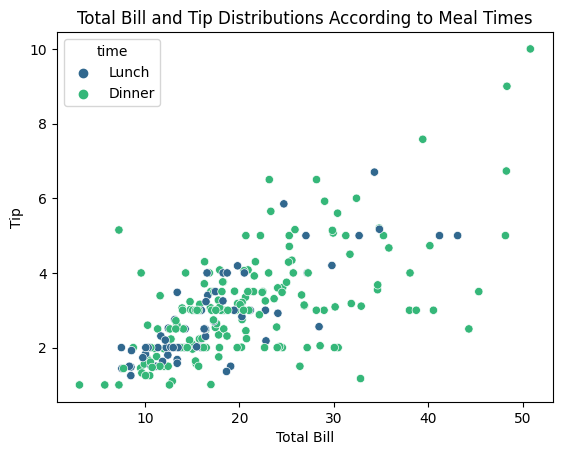

In [5]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

sns.scatterplot(tips,
                x = "total_bill",
                y = "tip",
                hue = "time",
                palette = "viridis")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill and Tip Distributions According to Meal Times")
plt.show()


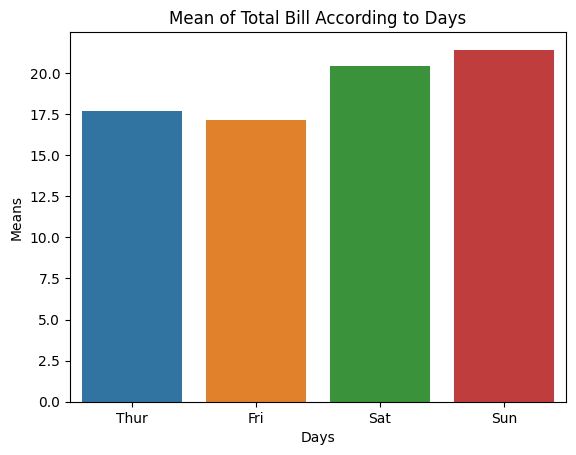

In [6]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

days_mean = tips.groupby(["day"]).total_bill.mean()

sns.barplot(x = days_mean.index,
            y = days_mean.values)


plt.xlabel("Days")
plt.ylabel("Means")
plt.title("Mean of Total Bill According to Days")
plt.show()

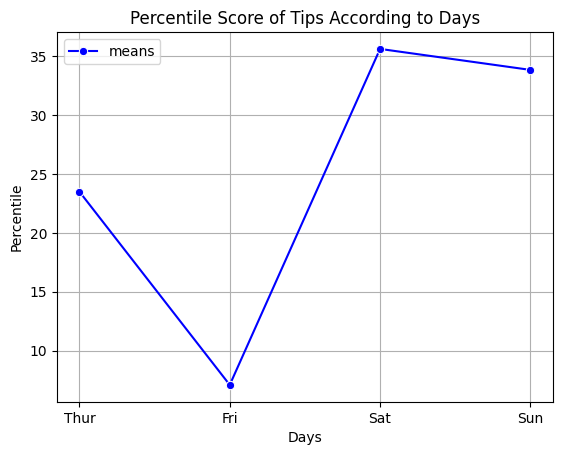

In [7]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.

data = tips.groupby(["day"]).tip.sum() / tips.tip.sum() * 100

sns.lineplot(data,
             x = data.index,
             y = data.values,
             color = "blue",
             marker = "o",
             label = "means")

plt.xlabel("Days")
plt.ylabel("Percentile")
plt.title("Percentile Score of Tips According to Days")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

group = tips.groupby("day")[["total_bill", "tip"]].mean().reset_index()
group


,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


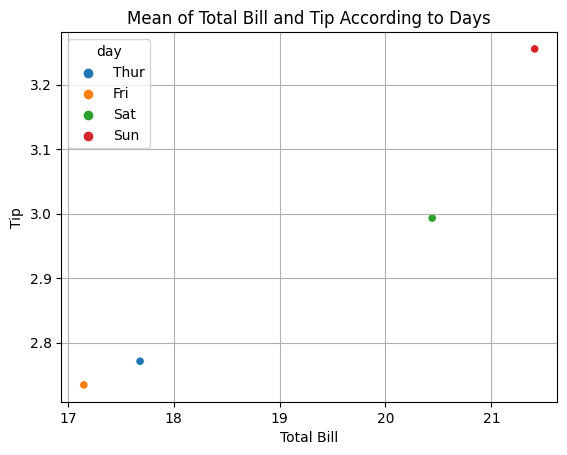

In [9]:
sns.scatterplot(group,
                x = "total_bill",
                y = "tip",
                hue = "day")

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Mean of Total Bill and Tip According to Days")
plt.grid(True)
plt.show()

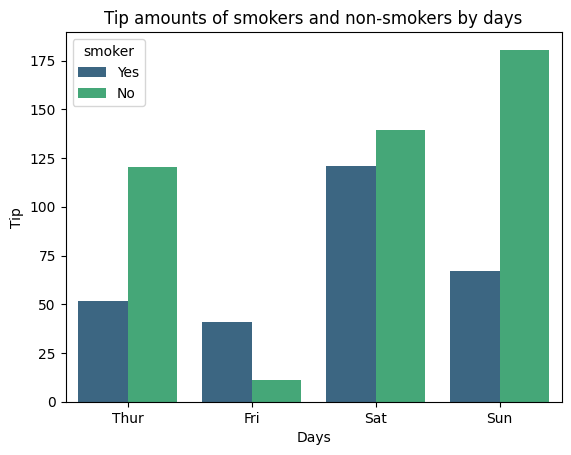

In [11]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

group = tips.groupby(["smoker", "day"]).tip.sum().reset_index()

sns.barplot(group,
            x = "day",
            y = "tip",
            hue = "smoker",
            palette = "viridis")
plt.xlabel("Days")
plt.ylabel("Tip")
plt.title("Tip amounts of smokers and non-smokers by days")
plt.show()

Text(0.5, 1.0, 'Distribution of tips paid to smokers and non-smokers')

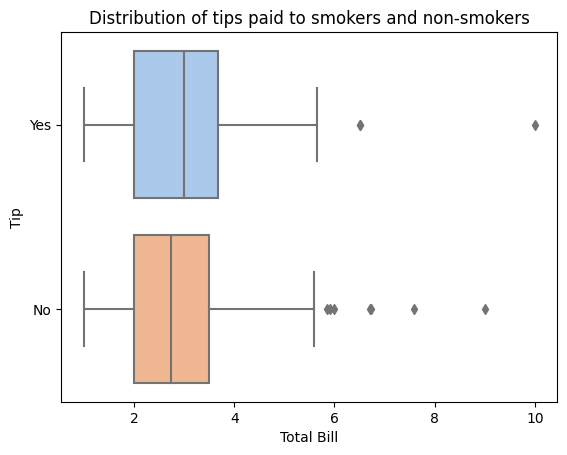

In [12]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

sns.boxplot(tips, x='tip', y='smoker', palette = "pastel")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Distribution of tips paid to smokers and non-smokers")

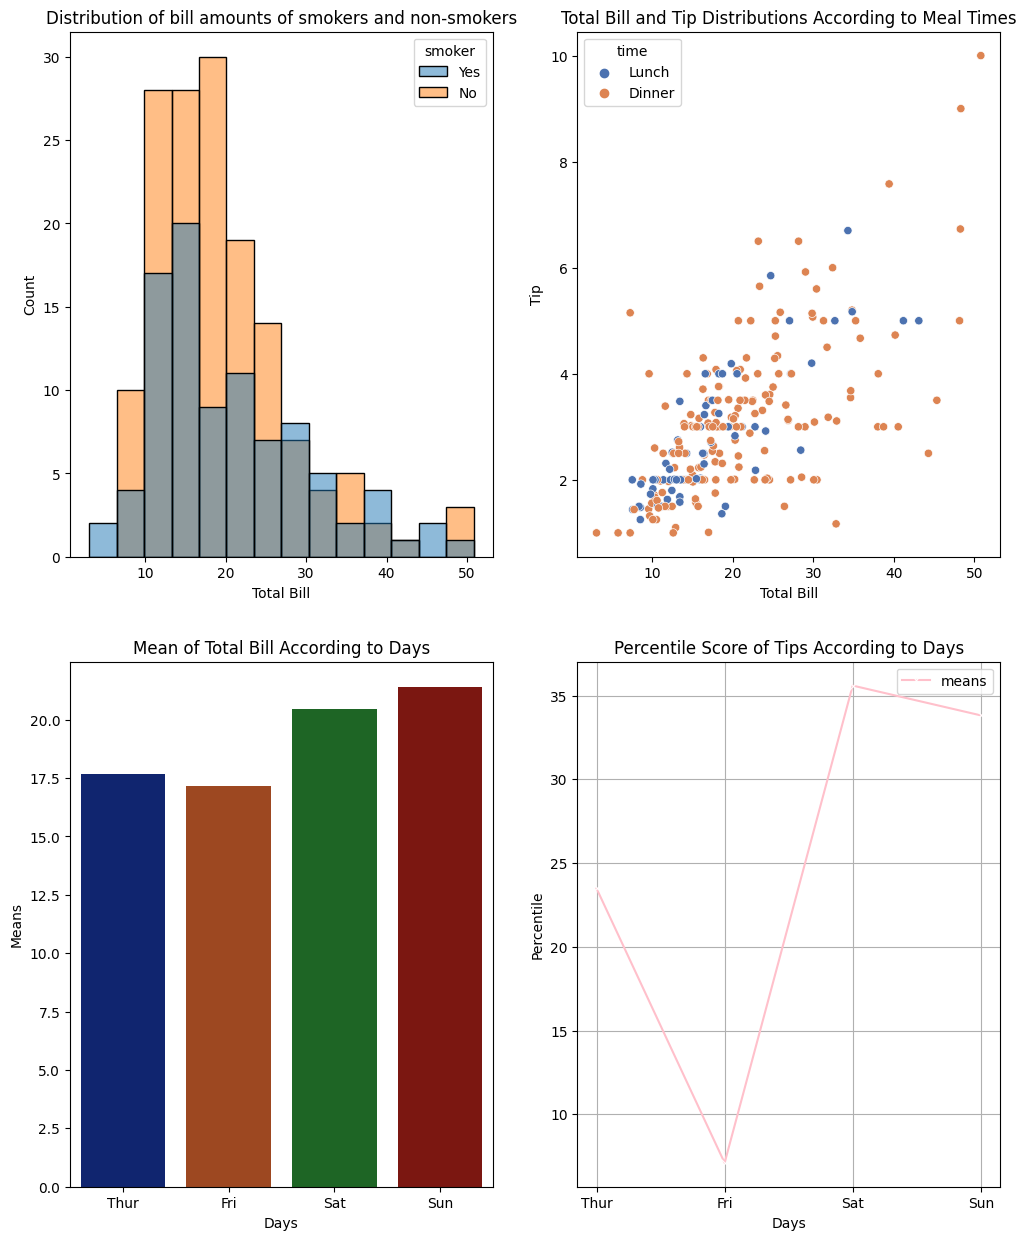

In [13]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.

plt.figure(figsize = (12,15))

plt.subplot(2, 2, 1)

sns.histplot(tips,
             x = "total_bill",
             hue = "smoker",
             alpha = 0.5)

plt.xlabel("Total Bill")
plt.title("Distribution of bill amounts of smokers and non-smokers")


plt.subplot(2, 2, 2)

sns.scatterplot(tips,
                x = "total_bill",
                y = "tip",
                hue = "time",
                palette = "deep")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill and Tip Distributions According to Meal Times")


plt.subplot(2, 2, 3)

sns.barplot(x = days_mean.index,
            y = days_mean.values,
            palette = "dark")

plt.xlabel("Days")
plt.ylabel("Means")
plt.title("Mean of Total Bill According to Days")


plt.subplot(2, 2, 4)

data = tips.groupby(["day"]).tip.sum() / tips.tip.sum() * 100

sns.lineplot(data,
             x = data.index,
             y = data.values,
             color = "pink",
             marker = "x",
             label = "means")

plt.xlabel("Days")
plt.ylabel("Percentile")
plt.title("Percentile Score of Tips According to Days")
plt.grid(True)